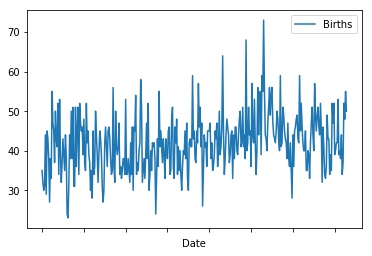

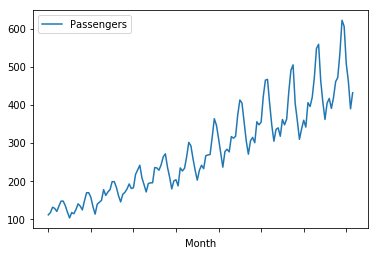

In [11]:
from pandas import read_csv
from matplotlib import pyplot

seriesBirths = read_csv('daily-total-female-births.csv', header=0, index_col=0)
seriesAirlines = read_csv('airline-passengers.csv', header=0, index_col=0)
seriesBirths.plot()
seriesAirlines.plot()
pyplot.show()

## Method 1. Augmented Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test(X):
    result = adfuller(X)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('Data1')
test()
print('Data2')
test(seriesAirlines.values.flatten())

## Method 2. Band Power

TODO:
* Fix this stuff, it looks wrong
* Compute actual power in each of the bands

In [28]:
from scipy.signal import butter, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def plots(data, freq, cutoff):
    fig, ax = plt.subplots(ncols=3, figsize=(15,4))
    
    lpf = butter_lowpass_filter(data, cutoff, freq)
    
    ax[0].plot(data)
    ax[1].plot(lpf)
    ax[2].psd(data, Fs=freq)
    
    ax[0].set_title('Data')
    ax[1].set_title('LPF')
    ax[2].set_title('PSD')
    plt.show()

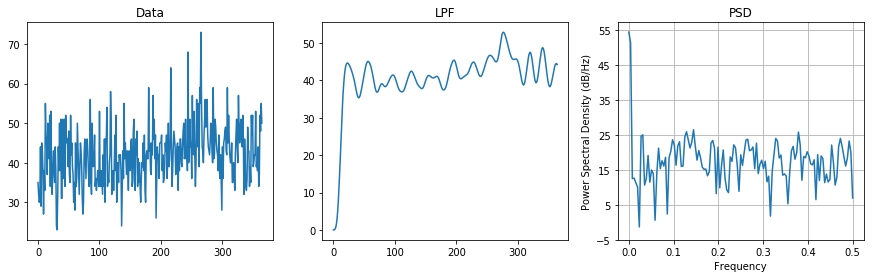

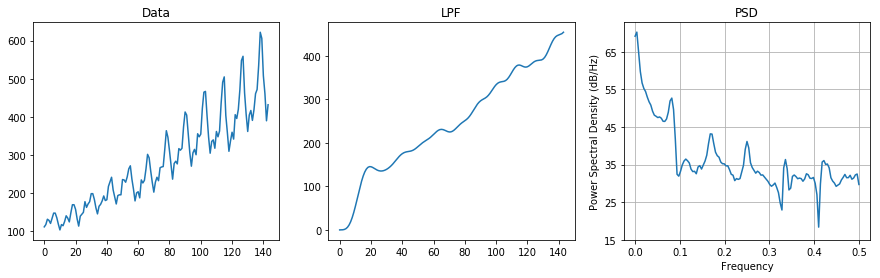

In [31]:
plots(seriesBirths.values.flatten(), 1, 0.05)
plots(seriesAirlines.values.flatten(), 1, 0.05)